In [ ]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

In [ ]:
# load the data
final_df= pd.read_csv(Path('./Resources/joined_df.csv'))

In [ ]:
#drop duplicate rows fast food
final_df= final_df.drop_duplicates()
final_df.head()

,state_name,state_population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita,diabetes_per_capita,number_of_obesity_cases,number_of_inactive_adults,number_of_smokers
0,Alabama,4874486,241,530018,0.000049,0.108733,293556,236498,91653
1,Alaska,739700,28,44862,0.000038,0.060649,23045,13385,6984
2,Arizona,7044008,494,501839,0.000070,0.071243,267683,227196,74093
3,Arkansas,3001345,235,299417,0.000078,0.099761,180694,146161,63780
4,California,39358497,1761,2593251,0.000045,0.065888,1403613,988700,339093


In [ ]:
#Scale the data
data_scaler = StandardScaler()
final_df[['number_of_restaurants', 'number_of_diabetes_cases', 'number_of_obesity_cases', 'number_of_inactive_adults', 'number_of_smokers']] = data_scaler.fit_transform(final_df[['number_of_restaurants', 'number_of_diabetes_cases', 'number_of_obesity_cases', 'number_of_inactive_adults', 'number_of_smokers']])
final_df.head()

,state_name,state_population,number_of_restaurants,number_of_diabetes_cases,restaurants_per_capita,diabetes_per_capita,number_of_obesity_cases,number_of_inactive_adults,number_of_smokers
0,Alabama,4874486,-0.378901,0.056957,0.000049,0.108733,0.054837,0.085878,0.173879
1,Alaska,739700,-1.003010,-0.865391,0.000038,0.060649,-0.859317,-0.866384,-0.912765
2,Arizona,7044008,0.362412,0.003385,0.000070,0.071243,-0.032597,0.046176,-0.051486
3,Arkansas,3001345,-0.396481,-0.381447,0.000078,0.099761,-0.326564,-0.299687,-0.183844
4,California,39358497,4.074836,3.979447,0.000045,0.065888,3.806123,3.296327,3.349531


In [ ]:
# convert to csv
final_df.to_csv(r'Resources/final_df.csv', index=False)

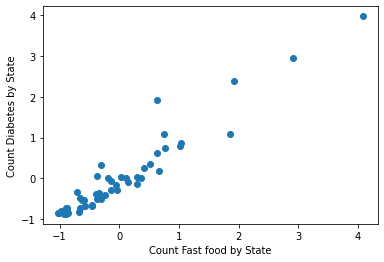

In [ ]:
# plot the data (count diabetes vs. fastfood)
plt.scatter(final_df.number_of_restaurants, final_df.number_of_diabetes_cases)
plt.xlabel('Count Fast food by State')
plt.ylabel('Count Diabetes by State')
plt.show()

In [ ]:
# define the x variable
X = final_df.number_of_restaurants.values.reshape(-1, 1)
X[:5]
X.shape

(51, 1)

In [ ]:
# define the y variable
y = final_df.number_of_diabetes_cases.values.reshape(-1, 1)
y.shape

(51, 1)

In [ ]:
# instantiate the model
model = LinearRegression()

In [ ]:
# fit the model
model.fit(X, y)

LinearRegression()

In [ ]:
# generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(51, 1)


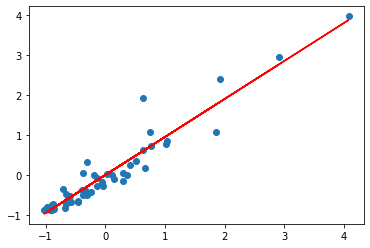

In [ ]:
# plot the predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
# examine the specific parameters of our model: the slope and the y-intercept
print(model.coef_)
print(model.intercept_)

[[0.95324075]]
[-5.08832062e-17]


In [ ]:
# Splitting into Train and Test sets into an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)

In [ ]:
# instantiate the model
model2 = LinearRegression()

In [ ]:
# fit the model
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
# generate predictions
y_pred = model2.predict(X_test)
print(y_pred.shape)

(11, 1)


In [ ]:
# Accuracy Score
r2_score = model2.score(y_test, y_pred)
print(r2_score*100,'%')

89.28350016320375 %


In [ ]:
mean_square = mean_squared_error(y_test, y_pred)
mean_square

0.02631892244387417

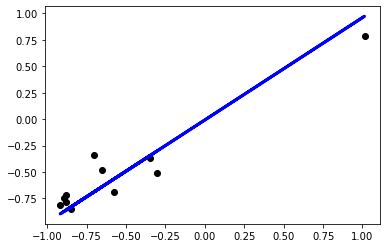

In [ ]:
plt.scatter(X_test, y_test, color= 'black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

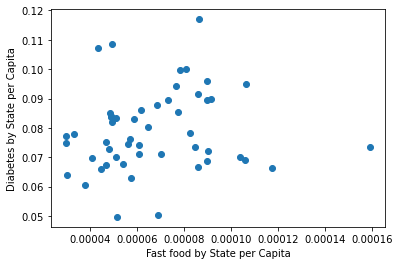

In [ ]:
# plot the data (per capita rates diabetes vs. fastfood)
plt.scatter(joined_population_df.restaurants_per_capita, joined_population_df.diabetes_per_capita)
plt.xlabel('Fast food by State per Capita')
plt.ylabel('Diabetes by State per Capita')
plt.show()